In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import numpy as np

In [2]:
df = pd.read_csv('data_1.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# EDA

## Target

count of total rental bikes including both casual and registered

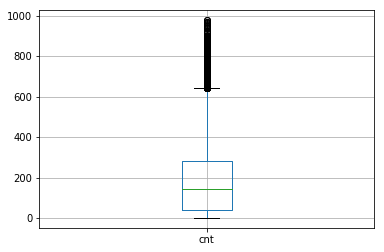

In [5]:
df.boxplot('cnt',grid=True)

C:\Users\GyuJin\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


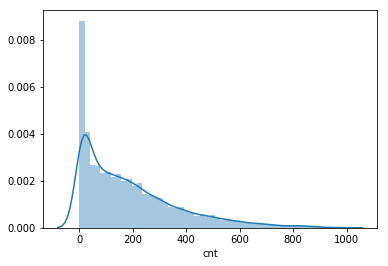

In [6]:
sns.distplot(df['cnt'])

- 왼쪽으로 치우쳐있음
- 아웃라이어들이 많이보임 -> 제거 할만한 아이디어는 아직없음
- 0부근이 압도적으로 많은듯?

## Date 변수로 한번 봐보자

In [7]:
date_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday']

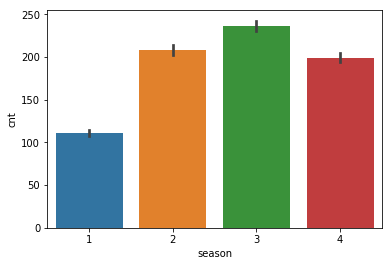

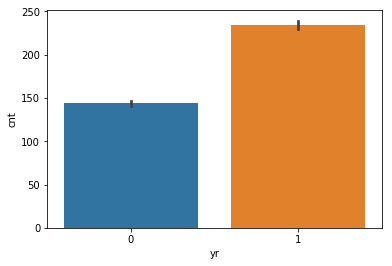

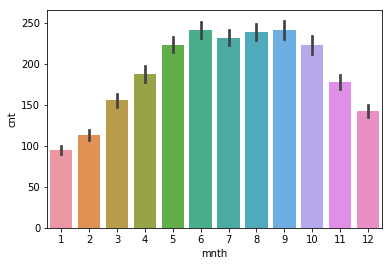

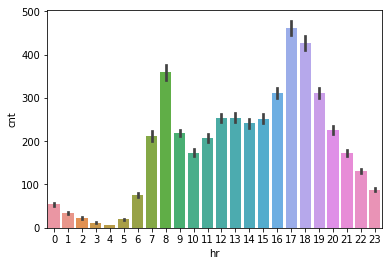

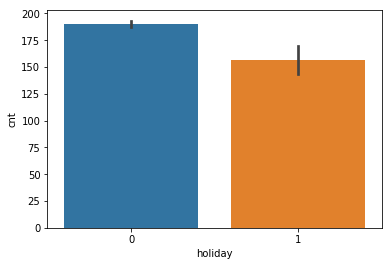

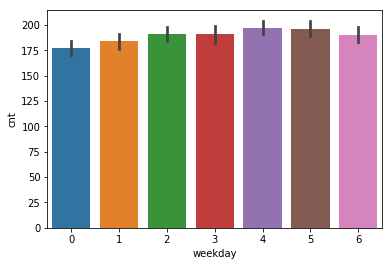

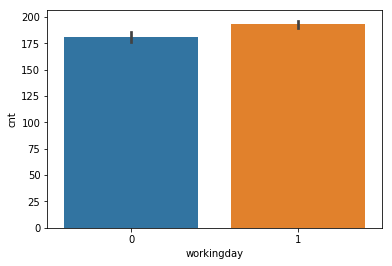

In [8]:
for col in date_cols:
    sns.barplot(x=col,y='cnt',data=df )
    plt.show()

- holiday랑 workingday가 무슨의미일 까??
- 휴일에 더 많이 타지만, 근무일에 더많이탄다 => 근로자나 학생들이 더많이 타는것으로 알수있음
- 여름 봄 가을 겨울 순
- 2012
- 6~9월 그중에서도 6월 9월
- 8시 17,18시 학교 등하교, 직장 출퇴근 시간
- 휴일이 아닌날
- 일하는날 

In [14]:
date_cols

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']

In [124]:
tt = date_cols+['cnt']

가장 세분화된 항목인 시간 단위로 특성을 비교해보자

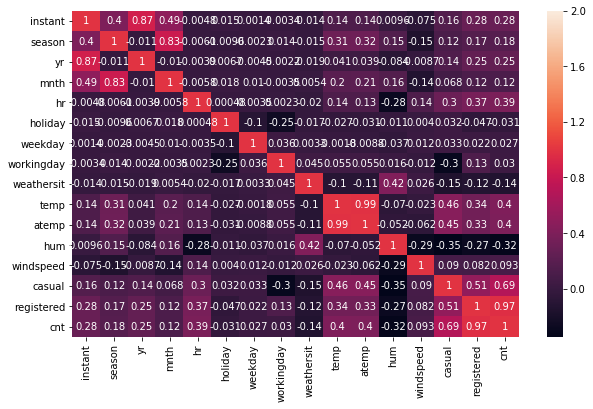

In [18]:
cor = df.corr()
f,ax =plt.subplots(figsize=(10,6))
sns.heatmap(cor,annot=True,vmax=2)

/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


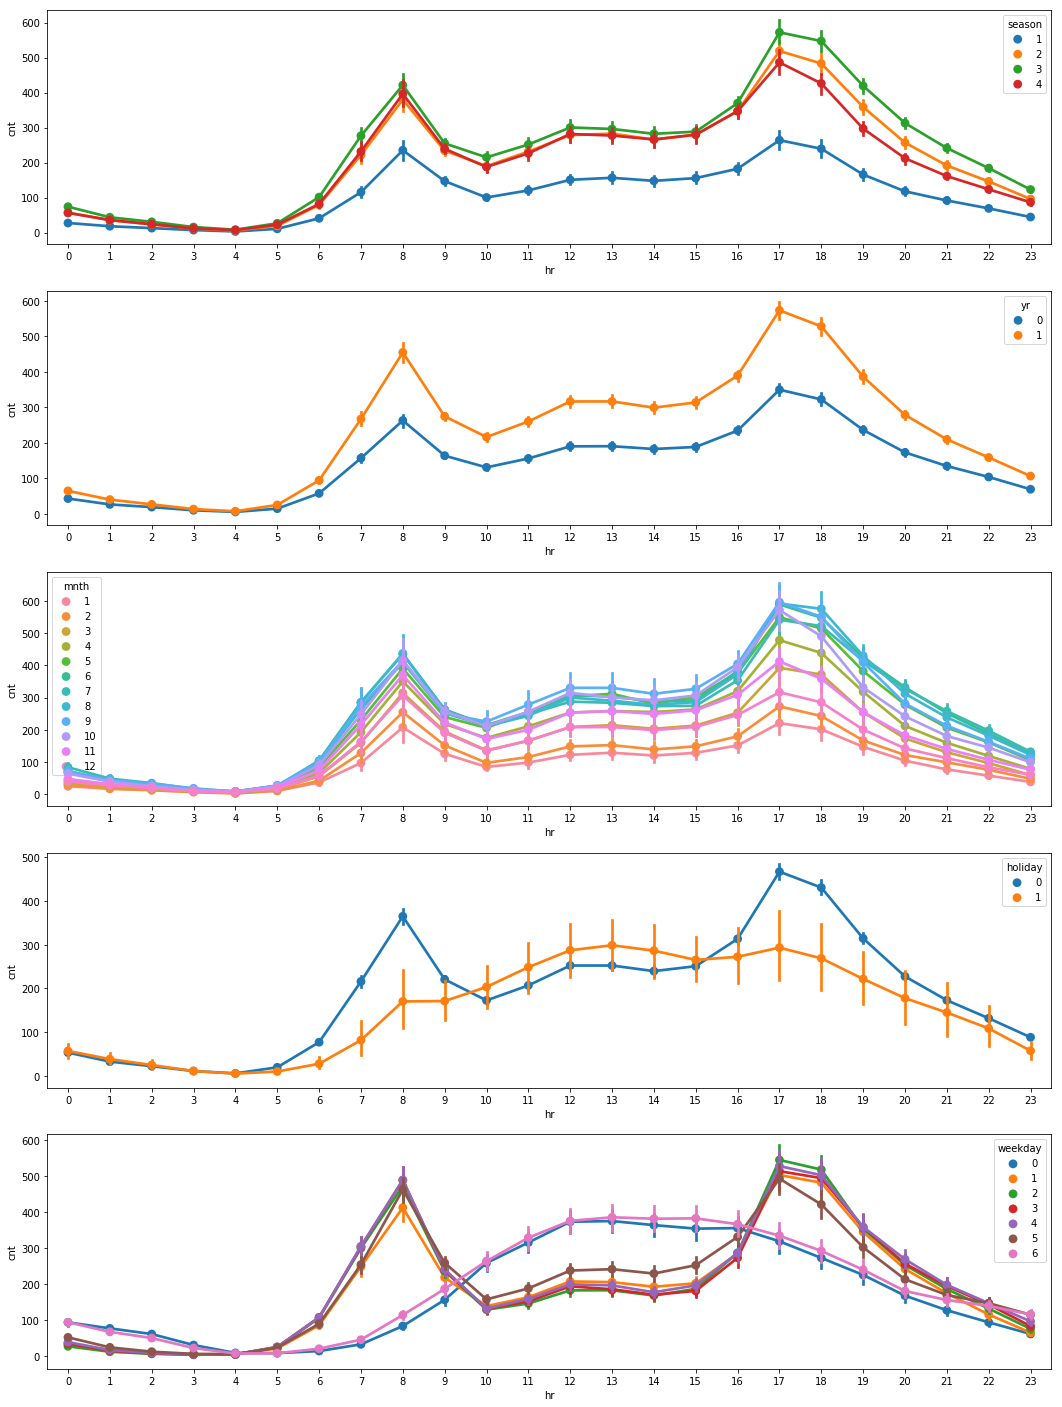

In [47]:
fig,ax = plt.subplots(nrows=5,figsize = (18,25))

sns.pointplot(data=df, x="hr", y="cnt", hue="season",ax=ax[0])

sns.pointplot(data=df, x="hr", y="cnt", hue="yr",ax=ax[1])

sns.pointplot(data=df, x="hr", y="cnt", hue="mnth",ax=ax[2])

sns.pointplot(data=df, x="hr", y="cnt", hue="holiday",ax=ax[3])

sns.pointplot(data=df, x="hr", y="cnt", hue="weekday",ax=ax[4])

/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


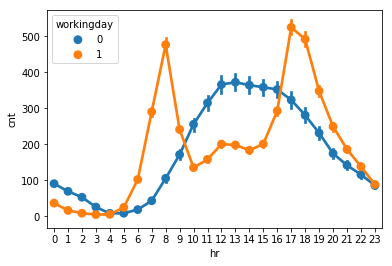

In [51]:

sns.pointplot(data=df, x="hr", y="cnt", hue="workingday")

- 계졀별로 비슷한 시간분포를 보이지만 겨울의 경우 이용량이 낮고 6~7시부근에 여름이 가장 이용량이 많은이유는 해가 일찍뜨는것으로 보인다
퇴근시간 17시이후 에는 특히 여름이 더 두드러진 사용량을 보인다.
- 휴일이 아닌경우 그전과 유사한 패턴이지만 휴일인경우 오전과 낮시간에 고르게 분포하는 것과 95프로 신뢰수준에 들어가는 분포가 넓다.
	- 이는 휴일에는 다양한 시간별 패턴으로 이용하는 것을 알 수 있다.
- weekday : 0,6 이 주말을 의미한것으로 판단 5가 금요일로 예측 -> 금요일의 경우 다른 근무일에 비교해 출퇴근아닌시간에도 많다.


## weather!

In [19]:
wea_cols = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed']

In [20]:
df[wea_cols].describe()

,weathersit,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,1.425283,0.496987,0.475775,0.627229,0.190098
std,0.639357,0.192556,0.171850,0.192930,0.122340
min,1.000000,0.020000,0.000000,0.000000,0.000000
25%,1.000000,0.340000,0.333300,0.480000,0.104500
50%,1.000000,0.500000,0.484800,0.630000,0.194000
75%,2.000000,0.660000,0.621200,0.780000,0.253700
max,4.000000,1.000000,1.000000,1.000000,0.850700


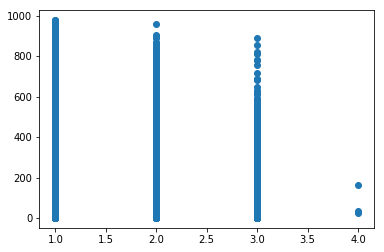

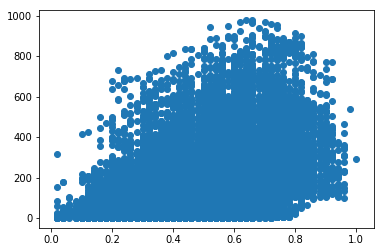

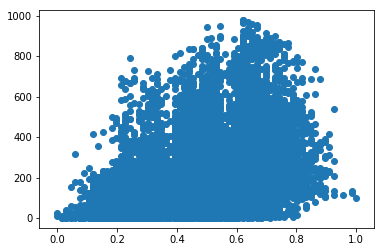

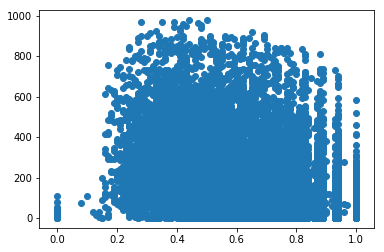

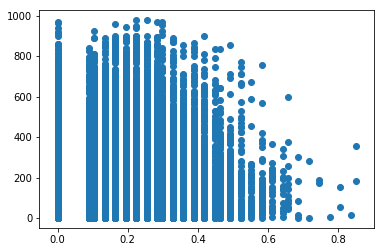

In [21]:
for col in wea_cols:
    plt.scatter(x=col,y='cnt',data=df)
    plt.show()

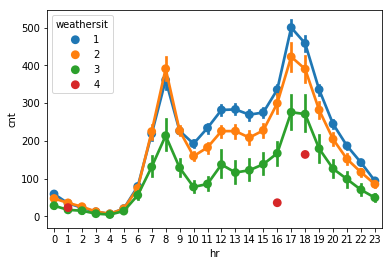

In [23]:
sns.pointplot(x='hr',y='cnt',hue='weathersit',data=df)

In [24]:
df[df.weathersit==4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [13]:
wea_cols = wea_cols +['cnt']

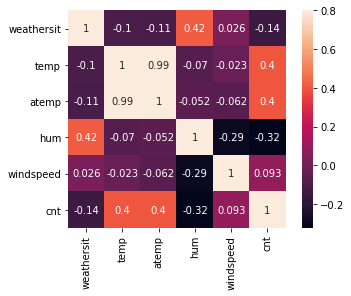

In [14]:
cor = df[wea_cols].corr()
sns.heatmap(cor,vmax=.8, square=True,annot=True)

- temp , atemp 는 양의 상관관계 습도는 음의상관관계가 보이지만 크게 상관성이있어보이지는 않는다
- temp와 atemp는 다중공선성이 발생한다
- 습도가 0인 부분이 존재한다
- weathersit 경우에는 4인경우 매우없다 1이 가장많다

## casual vs registered

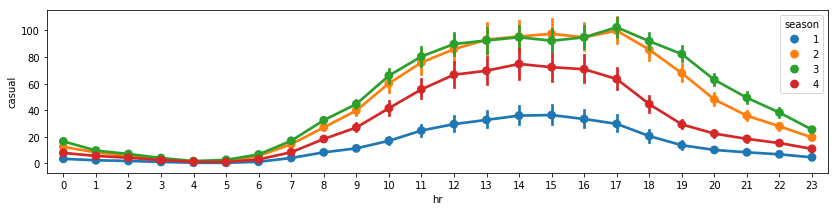

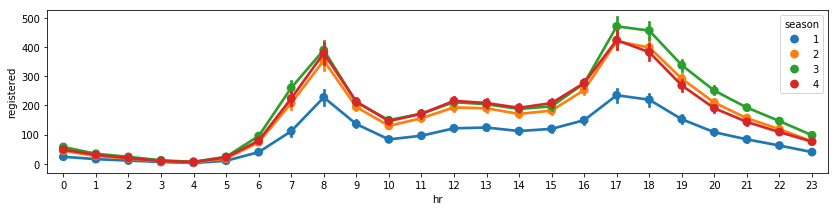

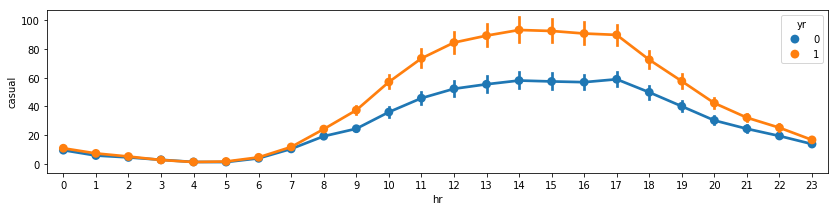

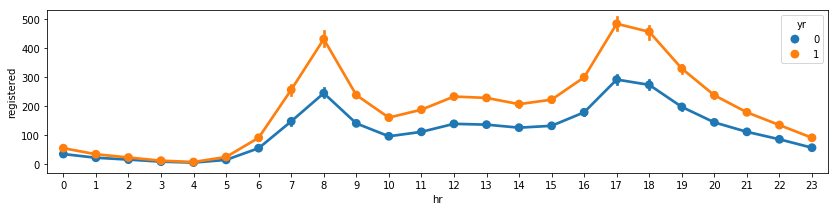

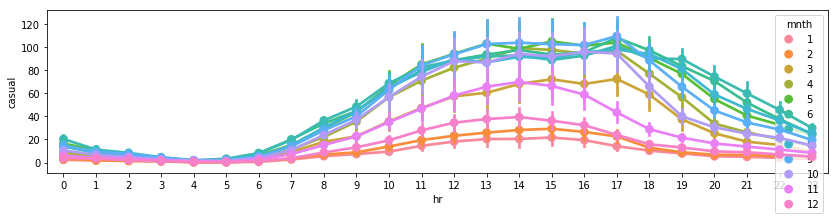

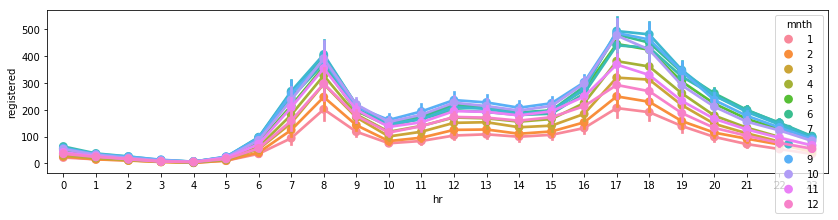

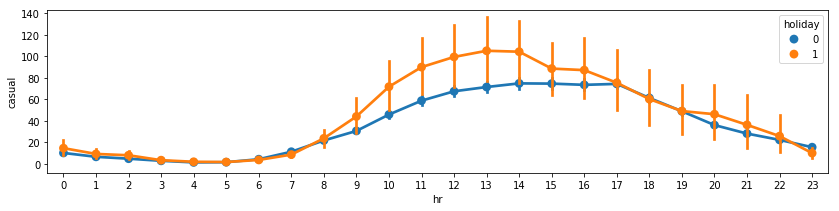

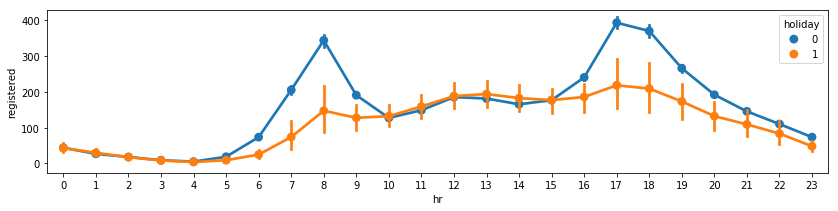

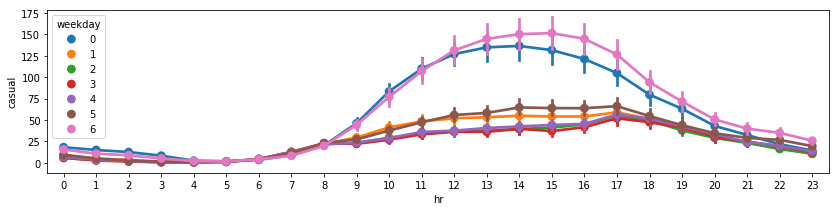

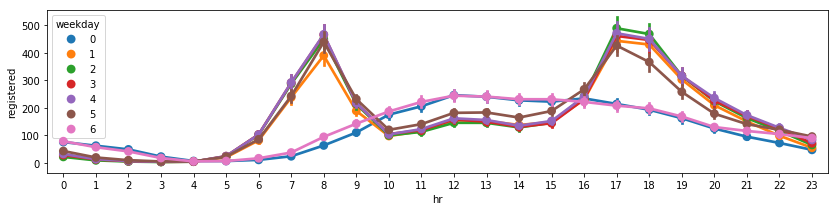

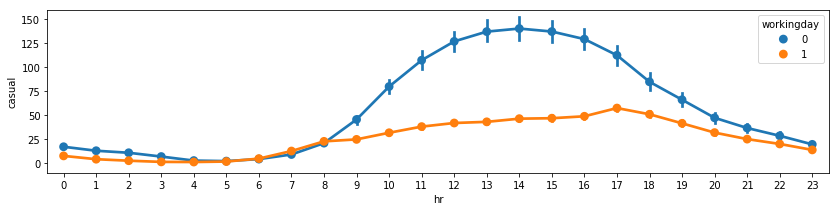

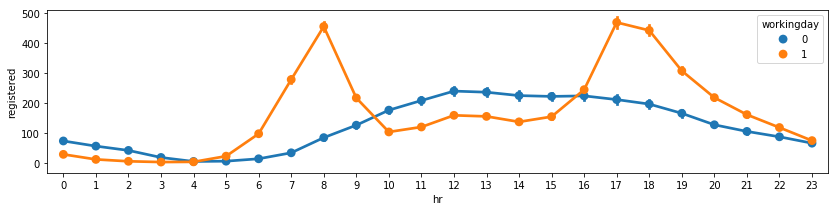

In [15]:
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="casual", hue="season")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="registered", hue="season")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="casual", hue="yr")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="registered", hue="yr")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="casual", hue="mnth")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="registered", hue="mnth")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="casual", hue="holiday")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="registered", hue="holiday")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="casual", hue="weekday")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="registered", hue="weekday")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="casual", hue="workingday")
plt.show()
fig,ax = plt.subplots(figsize=(14,3))
sns.pointplot(data=df, x="hr", y="registered", hue="workingday")
plt.show()

재밌는 결과다 
- 전체적으로 보면 casual 보단 registerd가 출퇴근이나 등하교를 하는것으로 보인다
- 이는 상당한 시사점을 주는데 예측모델을 만들때 registerd와 casual을 따로 만드는게 더 좋아보인다.
- 과연 그게 다를것인가 통계적 검증을 해볼수 있겠다

In [16]:
pd.concat([df.corr()[['casual']],df.corr()[['registered']]],1)

,casual,registered
instant,0.158295,0.282046
season,0.120206,0.174226
yr,0.142779,0.253684
mnth,0.068457,0.122273
hr,0.301202,0.374141
holiday,0.031564,-0.047345
weekday,0.032721,0.021578
workingday,-0.300942,0.134326
weathersit,-0.152628,-0.120966
temp,0.459616,0.335361


재밌는 특징은 cnt는 registered에 더 상관관계가 높고, casual한 고객일 경우 workingday가 아닌날에 자전거를 더타는것 같다

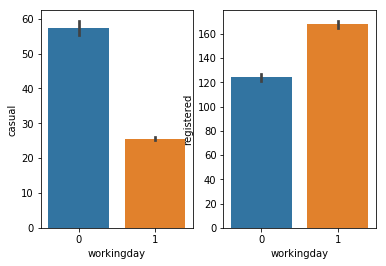

In [35]:
f, ax = plt.subplots(1,2)
sns.barplot(x='workingday',y='casual',ax=ax[0],data=df)
sns.barplot(x='workingday',y='registered',ax=ax[1],data=df)
plt.show()

## outlier

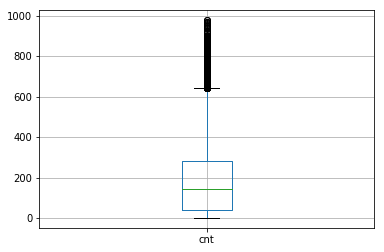

In [37]:
df.boxplot('cnt')

C:\Users\GyuJin\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


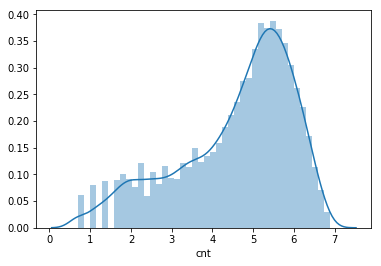

In [46]:
import scipy as sp
sns.distplot(sp.log1p(df['cnt']))

## Feature Engineering

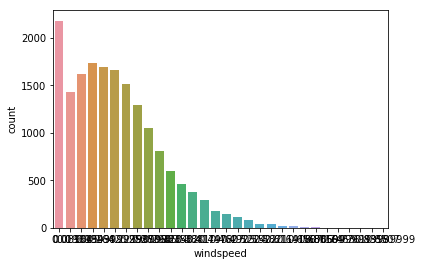

In [18]:

sns.countplot(data=df, x="windspeed")

In [19]:
dfWind0 = df.loc[df['windspeed'] == 0]
dfWindNot0 = df.loc[df['windspeed'] != 0]
print(dfWind0.shape)
print(dfWindNot0.shape)

(2180, 17)
(15199, 17)


In [20]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
 RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(df):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dfWind0 = df.loc[df['windspeed'] == 0]
    dfWindNot0 = df.loc[df['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ['weathersit', 'temp', 'atemp', 'hum', "mnth", "temp", "yr"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dfWindNot0["windspeed"] = dfWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dfWindNot0[wCol], dfWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dfWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dfWind0
    predictWindNot0 = dfWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dfWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    df = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    df["windspeed"] = df["windspeed"].astype("float")

    df.reset_index(inplace=True)
    df.drop('index', inplace=True, axis=1)
    
    return df

C:\Users\GyuJin\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\GyuJin\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\GyuJin\anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


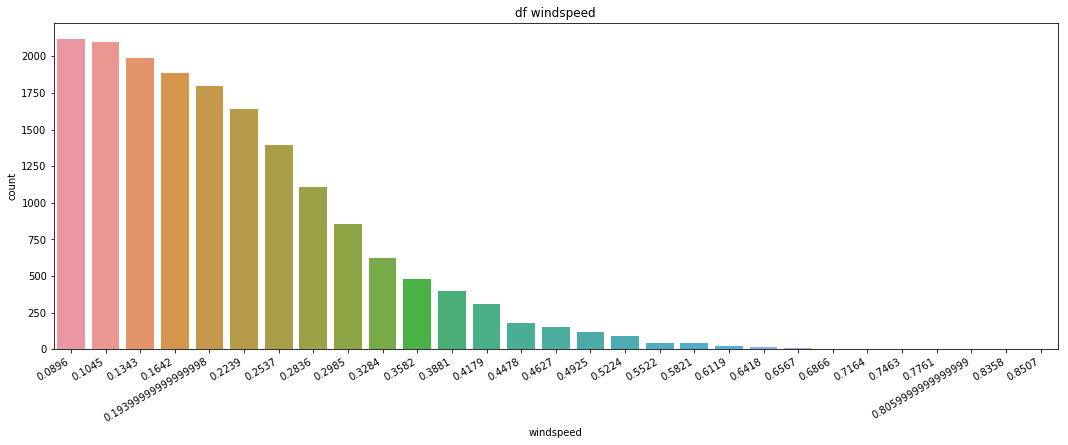

In [22]:
# 0값을 조정한다.
df = predict_windspeed(df)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="df windspeed")
sns.countplot(data=df, x="windspeed", ax=ax1)

## Feature selection
- 신호와 잡음을 구분해야 한다.
- 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
- 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [24]:
df[["workingday","weekday"]].corr() # 1. 근데 상관관계 보면 둘의 상관은 별로 없음...왜일까...??? 값을 바꿔줘야 해서 그런듯 

,workingday,weekday
workingday,1.000000,0.035955
weekday,0.035955,1.000000


In [25]:
def day(x):
    if x in [1,2,3,4,5]:
        return 1
    elif x in [0,6]:
        return 0
    
df["workday"] = df.weekday.apply(day)

In [26]:
df[["workingday","workday"]].corr() 

,workingday,workday
workingday,1.000000,0.934105
workday,0.934105,1.000000


In [27]:
season = pd.get_dummies(df['season'],prefix='season')
df = pd.concat([df,season],axis = 1)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,workday,season_1,season_2,season_3,season_4
0,6,2011-01-01,1,0,1,5,0,6,0,2,...,0.75,0.0896,0,1,1,0,1,0,0,0
1,11,2011-01-01,1,0,1,10,0,6,0,1,...,0.76,0.2537,12,24,36,0,1,0,0,0
2,12,2011-01-01,1,0,1,11,0,6,0,1,...,0.81,0.2836,26,30,56,0,1,0,0,0
3,13,2011-01-01,1,0,1,12,0,6,0,1,...,0.77,0.2836,29,55,84,0,1,0,0,0
4,14,2011-01-01,1,0,1,13,0,6,0,2,...,0.72,0.2985,47,47,94,0,1,0,0,0


In [28]:
df = df.drop('season',1)

In [29]:
weathersit = pd.get_dummies(df['weathersit'],prefix='weathersit')
df = pd.concat([df,weathersit],axis = 1)
df = df.drop('weathersit',1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
instant         17379 non-null int64
dteday          17379 non-null object
yr              17379 non-null int64
mnth            17379 non-null int64
hr              17379 non-null int64
holiday         17379 non-null int64
weekday         17379 non-null int64
workingday      17379 non-null int64
temp            17379 non-null float64
atemp           17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
cnt             17379 non-null int64
workday         17379 non-null int64
season_1        17379 non-null uint8
season_2        17379 non-null uint8
season_3        17379 non-null uint8
season_4        17379 non-null uint8
weathersit_1    17379 non-null uint8
weathersit_2    17379 non-null uint8
weathersit_3    17379 non-null uint8
weathersit_4    17379 non-null 

In [34]:
df.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'workday', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

In [35]:
# categorical data
categoricalFeatureNames = [ "mnth", "hr", "holiday", "weekday", "workingday", 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4']
numericalFeatureNames = ["temp", "atemp", "hum", "windspeed", "cnt"]
dropFeatures = ["instant",'dteday']

In [38]:
for var in categoricalFeatureNames:
    df[var] = df[var].astype("object")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
instant         17379 non-null int64
dteday          17379 non-null object
yr              17379 non-null int64
mnth            17379 non-null object
hr              17379 non-null object
holiday         17379 non-null object
weekday         17379 non-null object
workingday      17379 non-null object
temp            17379 non-null float64
atemp           17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
cnt             17379 non-null int64
workday         17379 non-null int64
season_1        17379 non-null object
season_2        17379 non-null object
season_3        17379 non-null object
season_4        17379 non-null object
weathersit_1    17379 non-null object
weathersit_2    17379 non-null object
weathersit_3    17379 non-null object
weathersit_4    173

## Baseline

In [48]:
from sklearn.model_selection import train_test_split, cross_validate
x_train,x_test,y_train,y_test=train_test_split(df.drop('cnt',axis=1),df['cnt'],test_size=0.3,random_state=42)

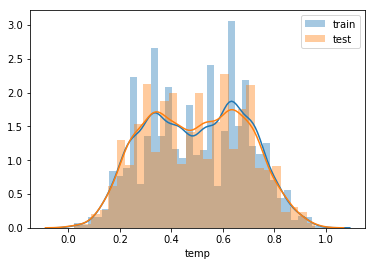

In [49]:
sns.distplot(x_train['temp'])
sns.distplot(x_test['temp'])
plt.legend(['train', 'test'])

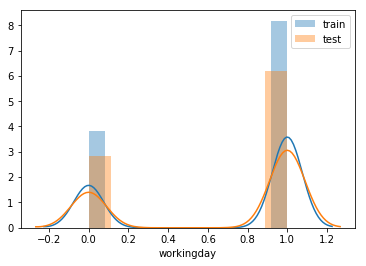

In [52]:
sns.distplot(x_train['workingday'].dropna())
sns.distplot(x_test['workingday'].dropna())
plt.legend(['train', 'test'])

In [41]:
Xtrain = x_train.copy()
Ytrian = y_train.copy()
Xtest = x_test.copy()
Ytest = y_test.copy()

In [67]:
x_train = x_train.drop(['casual','registered','instant','dteday'], axis=1)
x_test = x_test.drop(['casual','registered','instant','dteday'], axis=1)

In [68]:
x_train.columns

Index(['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'workday', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

In [1]:
from sklearn import metrics

In [2]:
metrics.mean_squared_error([1,2],[0,0])

2.5

In [69]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [71]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators = 100, n_jobs= -1, random_state = 0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
%time score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 42.3 s
Score= 0.35048


In [80]:
yLabelsLog = np.log1p(y_train)
ytest = np.log1p(y_test)
model.fit(x_train,yLabelsLog)
preds = model.predict(X= x_test)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(ytest),np.exp(preds)))

RMSLE Value For Random Forest:  0.29075887694478947


In [105]:
  
imp = pd.DataFrame({'imp':x_test.columns,'RMSLE':model.feature_importances_})
#imp[x_test.columns]=model.feature_importances_

C:\Users\GyuJin\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


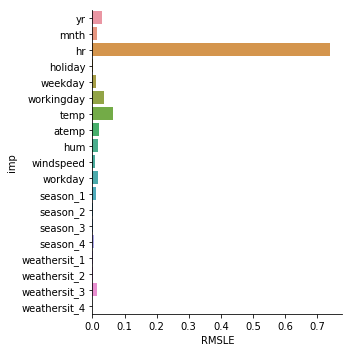

In [112]:
imp = pd.DataFrame({'imp':x_test.columns,'RMSLE':model.feature_importances_})
sns.factorplot(y='imp',x='RMSLE',data=imp,kind='bar')

In [53]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
# 예측
predictions = model.predict(x_test)
print(predictions.shape)
predictions[0:10]

(5214,)


array([118.68, 146.77, 137.91, 291.26,  23.64,  67.72, 346.59,  68.  ,
       443.48,  77.51])

In [55]:
rmsle(predictions, y_test)

0.34112325452755715

In [56]:
Y = y_test.copy()

## split registerd , Casual

In [119]:
dropFeatures = ["instant","dteday",'casual']
x_train = Xtrain.drop(dropFeatures, axis=1)
x_test = Xtest.drop(dropFeatures, axis=1)
y_train = Xtrain['registered']
y_test = Xtest['registered']
x_train = x_train.drop('registered', axis=1)
x_test = x_test.drop('registered', axis=1)

In [120]:
#from sklearn.model_selection import train_test_split, cross_validate
#x_train,x_test,y_train,y_test=train_test_split(df.drop('registered',axis=1),df['registered'],test_size=0.3,random_state=42)
#x_train = X_train.drop(dropFeatures, axis=1)
#x_test = X_test.drop(dropFeatures, axis=1)
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators = 100, n_jobs= -1, random_state = 0)
model.fit(x_train, y_train)
# 예측
predictions = model.predict(x_test)

C:\Users\GyuJin\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


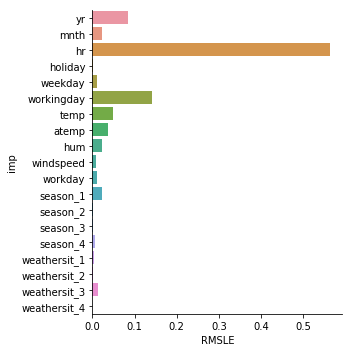

In [121]:
imp = pd.DataFrame({'imp':x_test.columns,'RMSLE':model.feature_importances_})
sns.factorplot(y='imp',x='RMSLE',data=imp,kind='bar')

C:\Users\GyuJin\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


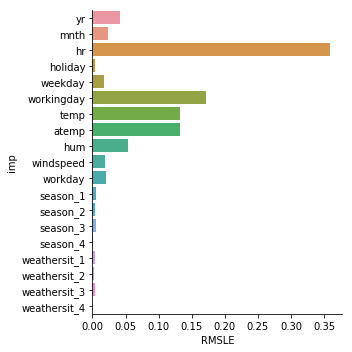

In [118]:
imp = pd.DataFrame({'imp':x_test.columns,'RMSLE':model.feature_importances_})
sns.factorplot(y='imp',x='RMSLE',data=imp,kind='bar')

In [59]:
pred1 =predictions.copy()

In [62]:
pred2 =predictions.copy()

In [63]:
pred_ = pred1+pred2

In [64]:
pred_

array([ 84.22, 140.64, 162.23, ...,   9.39, 221.54, 511.55])

In [65]:
rmsle(pred_, Y)

0.2600499811137774